In [1]:
#https://colab.research.google.com/drive/1Bk4zPQwAfzoSHZokKUefKL1s6lqmam6S?usp=sharing

import pandas as pd

df = pd.read_csv('NFLX_2.csv')
df

,Date,Open,High,Low,Close,Volume,SMA30,SMA8,EMA50,EMA12,K,D,RSI,Month,Year,Day,Day_Name
0,2018-03-19,315.799988,317.000000,307.339996,313.480011,9925200,291.264666,320.023750,299.206963,314.170719,59.605911,67.868628,62.913629,3,2018,19,1
1,2018-03-20,313.260010,319.500000,312.799988,317.500000,5991900,293.372666,320.086250,300.216405,314.685819,67.527072,65.510667,64.226588,3,2018,20,2
2,2018-03-21,316.350006,319.399994,314.510010,316.480011,5263900,295.064667,318.216251,301.099756,314.963171,65.517241,64.216742,64.205607,3,2018,21,3
3,2018-03-22,313.070007,314.119995,305.660004,306.700012,8063300,296.469334,316.391254,301.399407,313.686766,25.013757,52.686023,53.106117,3,2018,22,4
4,2018-03-23,307.410004,309.369995,300.359985,300.940002,9529900,298.164000,314.523754,301.375172,311.719007,1.725213,30.752070,41.505554,3,2018,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,527.323000,402.152504,539.286213,435.893139,39.251083,24.587551,29.680923,1,2022,31,1
976,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,523.003001,395.762504,536.064401,439.160349,54.805248,37.039918,36.337520,2,2022,1,2
977,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,517.527668,399.760006,531.884621,437.671066,41.208485,45.088272,33.694538,2,2022,2,3
978,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,510.883669,402.066257,526.932283,432.737057,28.965820,41.659851,33.107304,2,2022,3,4


In [241]:

df = df[['Date','Close','Day','Month']]

df

,Date,Close,Day,Month
0,2018-03-19,313.480011,19,3
1,2018-03-20,317.500000,20,3
2,2018-03-21,316.480011,21,3
3,2018-03-22,306.700012,22,3
4,2018-03-23,300.940002,23,3
...,...,...,...,...
975,2022-01-31,427.140015,31,1
976,2022-02-01,457.130005,1,2
977,2022-02-02,429.480011,2,2
978,2022-02-03,405.600006,3,2


In [242]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2018-03-19')
datetime_object

datetime.datetime(2018, 3, 19, 0, 0)

In [243]:
df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')
df

,Close,Day,Month
Date,,,
2018-03-19,313.480011,19,3
2018-03-20,317.500000,20,3
2018-03-21,316.480011,21,3
2018-03-22,306.700012,22,3
2018-03-23,300.940002,23,3
...,...,...,...
2022-01-31,427.140015,31,1
2022-02-01,457.130005,1,2
2022-02-02,429.480011,2,2


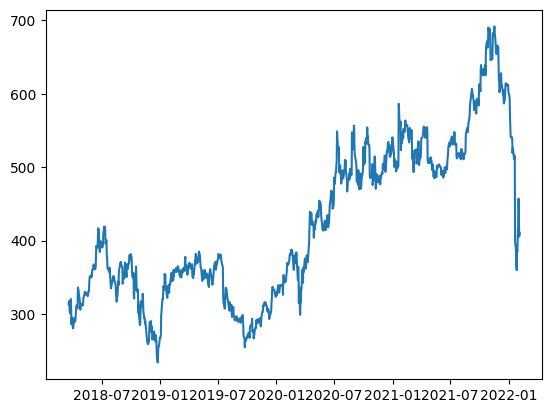

In [244]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [245]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2018-03-23	', 
                                '2022-02-04', 
                                n=3)

# temp_df = pd.read_csv('NFLX_2.csv')
# temp_df = temp_df[['Date','Close','Day','Month']]
# temp_df = temp_df.rename(columns={'Date': 'Target Date'})

# windowed_df =pd.concat([windowed_df,temp_df], axis = 1)
# df = df.drop(columns=['Target Date'])
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-03-23,317.500000,316.480011,306.700012,300.940002
1,2018-03-26,316.480011,306.700012,300.940002,320.350006
2,2018-03-27,306.700012,300.940002,320.350006,300.690002
3,2018-03-28,300.940002,320.350006,300.690002,285.769989
4,2018-03-29,320.350006,300.690002,285.769989,295.350006
...,...,...,...,...,...
971,2022-01-31,359.700012,386.700012,384.359985,427.140015
972,2022-02-01,386.700012,384.359985,427.140015,457.130005
973,2022-02-02,384.359985,427.140015,457.130005,429.480011
974,2022-02-03,427.140015,457.130005,429.480011,405.600006


In [246]:
import numpy as np

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((976,), (976, 3, 1), (976,))

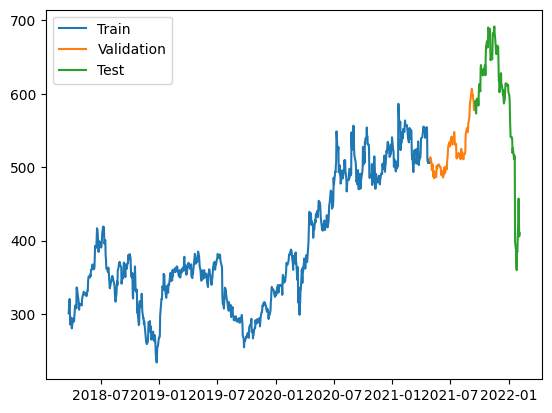

In [247]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 158185.7188 - mean_absolute_error: 388.3628 - val_loss: 273744.3438 - val_mean_absolute_error: 522.2848
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 156551.1250 - mean_absolute_error: 386.2441 - val_loss: 270708.6562 - val_mean_absolute_error: 519.3704
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 153067.7344 - mean_absolute_error: 381.7036 - val_loss: 264027.4375 - val_mean_absolute_error: 512.8980
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 146583.0156 - mean_absolute_error: 373.1005 - val_loss: 252032.5938 - val_mean_absolute_error: 501.0672
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 133370.5156 - mean_absolute_error: 354.8719 - val_loss: 227068.8438 - val_mean_absolute_error: 475.5046
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 112363.1406 - mean_absolute_error: 323.87

25/25 [==============================] - 0s 1ms/step


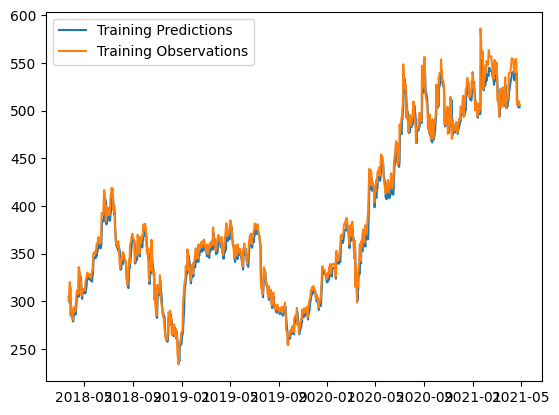

In [249]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 2ms/step


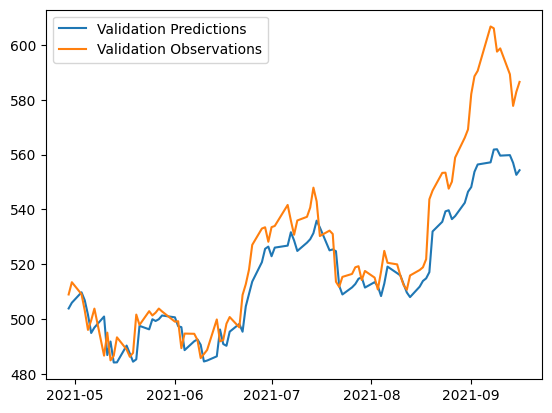

In [250]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 1ms/step


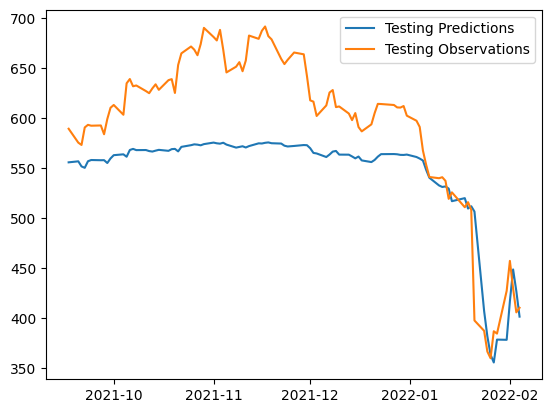

In [251]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

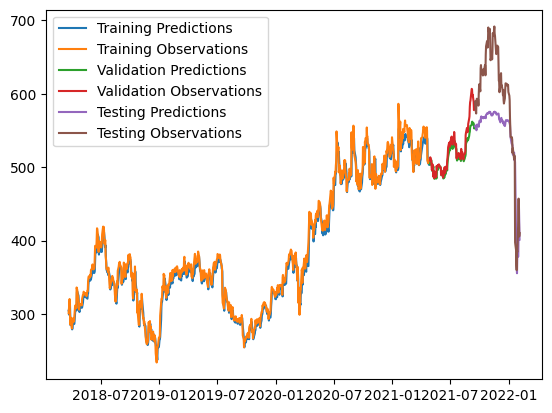

In [252]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])